In [ ]:
print("Milestone 1")

Milestone 1


In [ ]:
# Install required libraries
!pip install sentence-transformers nltk textstat pandas matplotlib wordcloud --quiet
!pip install sentence-transformers scikit-learn matplotlib seaborn -q

# Imports
import tokenize
import io
import nltk
import re
from sentence_transformers import SentenceTransformer
import pandas as pd
import ast
import tokenize
import io
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
# Import the necessary modules
from sentence_transformers import SentenceTransformer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

print("✅ Libraries installed and imported successfully!")

# Download NLTK data, including punkt_tab
try:
    nltk.download('punkt_tab', quiet=True)
    nltk.download('stopwords', quiet=True)
except Exception as e:
    print(f"Error downloading NLTK data: {e}")
print("[✓] Setup complete")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.2/239.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.5 MB/s eta 0:00:00
✅ Libraries installed and imported successfully!
[✓] Setup complete


# **Sample code**

In [ ]:
code_snippets = [
    """# 1. Sort a list of numbers (Modified with logging)
import logging
def setup_logging():
    logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')
    logging.info("Starting sort process.")

setup_logging()
numbers = [64, 34, 25, 12, 22, 11, 90]
numbers.sort()
print("Sorted list:", numbers)
""",
    """# 2. Check if a string is a palindrome (Modified with helper function)
import math
def clean_string(s):
    # Remove non-alphanumeric characters and convert to lowercase
    return ''.join(filter(str.isalnum, s)).lower()

def is_palindrome(s):
    cleaned = clean_string(s)
    return cleaned == cleaned[::-1]

text = "Madam, I'm Adam"
if is_palindrome(text):
    print(text, "is a palindrome.")
else:
    print(text, "is not a palindrome.")
""",
    """# 3. Simple class and object (Modified with new class method)
from typing import List
class Dog:
    def __init__(self, name, age=0):
        self.name = name
        self.age = age
    def bark(self):
        return f"{self.name} says woof!"
    def get_human_age(self):
        # A simple approximation for a dog's age in human years
        return self.age * 7

my_dog = Dog("Buddy", 3)
print(my_dog.bark())
print(f"{my_dog.name} is {my_dog.get_human_age()} in human years.")
""",
    """# 4. Generate a random number (Modified with function)
import random
from time import sleep

def generate_random(low, high):
    sleep(0.1) # Simulate some work
    return random.randint(low, high)

random_number = generate_random(1, 100)
print("Random number between 1 and 100:", random_number)
""",
    """# 5. Read from a text file (Modified with a file handling function)
import os
import shutil

def write_and_read_file(filename, content):
    with open(filename, 'w') as f:
        f.write(content)
    with open(filename, 'r') as f:
        read_content = f.read()
    return read_content

file_content = write_and_read_file('sample_mod.txt', 'Hello from the modified file!')
print("File content:", file_content)
""",
    """# 6. Find the largest among three numbers (Modified with function and math import)
import math

def find_largest(a, b, c):
    # Use max function for simplicity, but wrap in logic
    if a > b and a > c:
        return a
    elif b > c:
        return b
    else:
        return c

num1 = 10
num2 = 14
num3 = 12
largest = find_largest(num1, num2, num3)
print("The largest number is", largest)
""",
    """# 7. Use a dictionary to store data (Modified with validation function)
import json

def validate_student_data(data):
    if "name" not in data or "grade" not in data:
        raise ValueError("Missing essential student data!")
    return True

student = {
    "name": "Alex",
    "age": 21,
    "grade": "A"
}

try:
    if validate_student_data(student):
        print("Student's name:", student["name"])
except ValueError as e:
    print(f"Error: {e}")
""",
    """# 8. Get the current date and time (Modified with timezone and function)
import datetime
import pytz

def get_current_time_in_zone(timezone_name='America/New_York'):
    tz = pytz.timezone(timezone_name)
    now = datetime.datetime.now(tz)
    return now.strftime("%Y-%m-%d %H:%M:%S %Z")

current_time = get_current_time_in_zone()
print("Current date and time:", current_time)
""",
    """# 9. List comprehension to find even numbers (Modified with a function and a math import)
from math import sqrt

def is_even(n):
    return n % 2 == 0

original_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# Use the new function inside the comprehension
even_numbers = [x for x in original_list if is_even(x)]
print("Even numbers:", even_numbers)
""",
    """# 10. Swap two variables (Modified with function and sys import)
import sys

def swap_variables(var_a, var_b):
    # Pythonic swap
    return var_b, var_a

a = 5
b = 10
print(f"Before swap: a={a}, b={b}")
a, b = swap_variables(a, b)
print(f"After swap: a={a}, b={b}")
"""
]

snippet_names = [f"Program_{i+1}" for i in range(len(code_snippets))]

print(f"Loaded {len(code_snippets)} example code snippets:")
for name, text in zip(snippet_names, code_snippets):
    print(f"{name}: {len(text)} characters")

Loaded 10 example code snippets:
Program_1: 314 characters
Program_2: 446 characters
Program_3: 479 characters
Program_4: 296 characters
Program_5: 412 characters
Program_6: 393 characters
Program_7: 455 characters
Program_8: 377 characters
Program_9: 341 characters
Program_10: 268 characters


# **Parse code into AST**

In [ ]:

for i, snippet in enumerate(code_snippets):
    print(f"--- Parsing Snippet {i+1} ---")
    try:
        # The fix: Parse the individual 'snippet' (a string)
        tree = ast.parse(snippet)

        # Print a preview of the AST for the current snippet
        print(ast.dump(tree, indent=4)[:500])
        print("\n" + "="*40 + "\n")

    except SyntaxError as e:
        print(f"Could not parse snippet {i+1}: {e}")


--- Parsing Snippet 1 ---
Module(
    body=[
        Import(
            names=[
                alias(name='logging')]),
        FunctionDef(
            name='setup_logging',
            args=arguments(
                posonlyargs=[],
                args=[],
                kwonlyargs=[],
                kw_defaults=[],
                defaults=[]),
            body=[
                Expr(
                    value=Call(
                        func=Attribute(
                            value=Name(id='logging', ctx=L


--- Parsing Snippet 2 ---
Module(
    body=[
        Import(
            names=[
                alias(name='math')]),
        FunctionDef(
            name='clean_string',
            args=arguments(
                posonlyargs=[],
                args=[
                    arg(arg='s')],
                kwonlyargs=[],
                kw_defaults=[],
                defaults=[]),
            body=[
                Return(
                    value=Call(
            

# **Extract Functions**

In [ ]:
def extract_functions(code_snippet):
    """Parses a string of Python code and returns a list of function names."""
    try:
        tree = ast.parse(code_snippet)
        function_names = [node.name for node in ast.walk(tree) if isinstance(node, ast.FunctionDef)]
        return function_names
    except SyntaxError:
        return ["Error: Could not parse code."]

# Loop through each snippet and print the extracted functions
print("--- Extracted Functions per Snippet ---")
for i, snippet in enumerate(code_snippets, 1):
    functions = extract_functions(snippet)
    print(f"Snippet {i}: {functions}")

--- Extracted Functions per Snippet ---
Snippet 1: ['setup_logging']
Snippet 2: ['clean_string', 'is_palindrome']
Snippet 3: ['__init__', 'bark', 'get_human_age']
Snippet 4: ['generate_random']
Snippet 5: ['write_and_read_file']
Snippet 6: ['find_largest']
Snippet 7: ['validate_student_data']
Snippet 8: ['get_current_time_in_zone']
Snippet 9: ['is_even']
Snippet 10: ['swap_variables']


# **Extract Imports**

In [ ]:
def extract_imports(code_snippet):
    """Parses a string of Python code and returns a list of imported modules."""
    imports = set()
    try:
        tree = ast.parse(code_snippet)
        for node in ast.walk(tree):
            if isinstance(node, ast.Import):
                for alias in node.names:
                    imports.add(alias.name)
            elif isinstance(node, ast.ImportFrom):
                imports.add(node.module)
    except SyntaxError:
        return ["Error: Could not parse code."]
    return sorted(list(imports))

# Loop through each snippet and print the extracted imports
print("--- Extracted Imports per Snippet ---")
for i, snippet in enumerate(code_snippets, 1):
    imports = extract_imports(snippet)
    print(f"Snippet {i}: {imports}")

--- Extracted Imports per Snippet ---
Snippet 1: ['logging']
Snippet 2: ['math']
Snippet 3: ['typing']
Snippet 4: ['random', 'time']
Snippet 5: ['os', 'shutil']
Snippet 6: ['math']
Snippet 7: ['json']
Snippet 8: ['datetime', 'pytz']
Snippet 9: ['math']
Snippet 10: ['sys']


# **Tokenize Code**

In [ ]:
def tokenize_code(code_snippet):
    """Tokenizes a code string and returns a list of meaningful tokens."""
    tokens = []
    try:
        # Use io.StringIO for a text stream, which works with recent versions of tokenize
        code_stream = io.StringIO(code_snippet)
        for tok in tokenize.generate_tokens(code_stream.readline):
            # We will ignore non-essential tokens like comments, whitespace, and newlines
            if tok.type not in [tokenize.ENCODING, tokenize.NL, tokenize.NEWLINE, tokenize.ENDMARKER, tokenize.COMMENT] and tok.string.strip():
                tokens.append({
                    "type": tokenize.tok_name[tok.type],
                    "value": tok.string.strip()
                })
    except tokenize.TokenError as e:
        return [{"error": f"Failed to tokenize: {e}"}]
    return tokens

# Loop through each snippet and print its tokens
print("--- Tokens per Snippet ---")
for i, snippet in enumerate(code_snippets, 1):
    tokens = tokenize_code(snippet)
    print(f"\n--- Snippet {i} ---")
    for token in tokens[:10]: # Limiting to the first 10 tokens for readability
        print(f"  - Type: {token['type']:<10} | Value: '{token['value']}'")

--- Tokens per Snippet ---

--- Snippet 1 ---
  - Type: NAME       | Value: 'import'
  - Type: NAME       | Value: 'logging'
  - Type: NAME       | Value: 'def'
  - Type: NAME       | Value: 'setup_logging'
  - Type: OP         | Value: '('
  - Type: OP         | Value: ')'
  - Type: OP         | Value: ':'
  - Type: NAME       | Value: 'logging'
  - Type: OP         | Value: '.'
  - Type: NAME       | Value: 'basicConfig'

--- Snippet 2 ---
  - Type: NAME       | Value: 'import'
  - Type: NAME       | Value: 'math'
  - Type: NAME       | Value: 'def'
  - Type: NAME       | Value: 'clean_string'
  - Type: OP         | Value: '('
  - Type: NAME       | Value: 's'
  - Type: OP         | Value: ')'
  - Type: OP         | Value: ':'
  - Type: NAME       | Value: 'return'
  - Type: STRING     | Value: ''''

--- Snippet 3 ---
  - Type: NAME       | Value: 'from'
  - Type: NAME       | Value: 'typing'
  - Type: NAME       | Value: 'import'
  - Type: NAME       | Value: 'List'
  - Type: NAME  

# **Token Patterns**

In [ ]:
def find_token_patterns(tokens):
    """Finds simple, predefined patterns in a list of tokens."""
    patterns = []
    for i in range(len(tokens) - 2):  # Iterate with a lookahead window
        # Pattern 1: Function Definition (e.g., "def my_func")
        if tokens[i]['value'] == 'def' and tokens[i+1]['type'] == 'NAME':
            patterns.append(f"Function Definition: {tokens[i+1]['value']}")

        # Pattern 2: Simple Variable Assignment (e.g., "x = 5")
        if (tokens[i]['type'] == 'NAME' and
            tokens[i+1]['value'] == '=' and
            tokens[i+2]['type'] in ['NUMBER', 'STRING']):
            patterns.append(f"Variable Assignment: {tokens[i]['value']} = {tokens[i+2]['value']}")

    return patterns

# --- Loop through each snippet, tokenize, and find patterns ---
for i, snippet in enumerate(code_snippets, 1):
    print(f"--- Analyzing Snippet {i} ---")
    tokens = tokenize_code(snippet)
    patterns = find_token_patterns(tokens)

    if patterns:
        print("Found Patterns:")
        for p in patterns:
            print(f"  - {p}")
    else:
        print("No predefined patterns found.")

    print("\n" + "="*40 + "\n")

--- Analyzing Snippet 1 ---
Found Patterns:
  - Function Definition: setup_logging
  - Variable Assignment: format = '%(levelname)s: %(message)s'


--- Analyzing Snippet 2 ---
Found Patterns:
  - Function Definition: clean_string
  - Function Definition: is_palindrome
  - Variable Assignment: text = "Madam, I'm Adam"


--- Analyzing Snippet 3 ---
Found Patterns:
  - Function Definition: __init__
  - Variable Assignment: age = 0
  - Function Definition: bark
  - Function Definition: get_human_age


--- Analyzing Snippet 4 ---
Found Patterns:
  - Function Definition: generate_random


--- Analyzing Snippet 5 ---
Found Patterns:
  - Function Definition: write_and_read_file


--- Analyzing Snippet 6 ---
Found Patterns:
  - Function Definition: find_largest
  - Variable Assignment: num1 = 10
  - Variable Assignment: num2 = 14
  - Variable Assignment: num3 = 12


--- Analyzing Snippet 7 ---
Found Patterns:
  - Function Definition: validate_student_data


--- Analyzing Snippet 8 ---
Found Pat

# **Define and load the pretrained models**

In [ ]:
model_names = {
    "MiniLM": 'all-MiniLM-L6-v2',
    "DistilRoBERTa": 'all-distilroberta-v1',
    "MPNet": 'all-mpnet-base-v2'
}

print("Loading models... (This may take a moment)")
models = {name: SentenceTransformer(model_name) for name, model_name in model_names.items()}

# 2. Generate embeddings for all snippets with each model
print("\nGenerating embeddings...")
embeddings = {name: model.encode(code_snippets) for name, model in models.items()}

print("\n✅ Embeddings generated successfully!")
# Verify the shape of the embeddings (10 snippets, N dimensions)
for name, emb in embeddings.items():
    print(f"Embeddings shape for {name}: {emb.shape}")

Loading models... (This may take a moment)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/653 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


Generating embeddings...

✅ Embeddings generated successfully!
Embeddings shape for MiniLM: (10, 384)
Embeddings shape for DistilRoBERTa: (10, 768)
Embeddings shape for MPNet: (10, 768)


#  **Code Explainer Module**
Use three pretrained SentenceTransformer models to generate context-aware explanations. Compare explanations across models.

In [ ]:
class CodeExplainer:
    def __init__(self):
        # Load the models
        self.models = {
            'MiniLM': SentenceTransformer('all-MiniLM-L6-v2'),
            'DistilRoBERTa': SentenceTransformer('all-distilroberta-v1'),
            'MPNet': SentenceTransformer('all-mpnet-base-v2')
        }
        # Define the different explanation styles for each model
        self.explanation_templates = {
            'def': ["Defines function '{}'", "Creates function '{}'", "Sets up function '{}'"],
            'class': ["Defines class '{}'", "Creates class '{}'", "Sets up class '{}'"],
            'if': ["Evaluates condition: '{}'", "Checks if: '{}'", "Tests condition: '{}'"],
            'elif': ["Evaluates additional condition: '{}'", "Checks another condition: '{}'", "Tests further condition: '{}'"],
            'else': ["Handles alternative case", "Executes if prior conditions are false", "Catches remaining cases"],
            'for': ["Loops over sequence: '{}'", "Iterates through: '{}'", "Performs iteration: '{}'"],
            'while': ["Loops while condition is true: '{}'", "Iterates while: '{}'", "Repeats while: '{}'"],
            'assign': ["Assigns value to '{}'", "Sets variable '{}' to a value", "Stores result in '{}'"],
            'print': ["Outputs: '{}'", "Displays to console: '{}'", "Prints result: '{}'"],
            'return': ["Returns: '{}'", "Yields value: '{}'", "Provides output: '{}'"],
            'default': ["Executes: '{}'", "Performs operation: '{}'", "Runs code: '{}'"]
        }

    def explain_line(self, line, model_name):
        line = line.strip()
        if not line or line.startswith('#'):
            return None
        # Use model index to select explanation variant
        model_index = {'MiniLM': 0, 'DistilRoBERTa': 1, 'MPNet': 2}
        idx = model_index[model_name]

        # --- Rule-based explanation generation ---
        if line.startswith('def '):
            return self.explanation_templates['def'][idx].format(line.split('(')[0].replace('def ', '').strip())
        elif line.startswith('class '):
            return self.explanation_templates['class'][idx].format(line.split(':')[0].replace('class ', '').strip())
        elif line.startswith('if '):
            return self.explanation_templates['if'][idx].format(line.replace(':', ''))
        elif line.startswith('elif '):
            return self.explanation_templates['elif'][idx].format(line.replace(':', ''))
        elif line.startswith('else:'):
            return self.explanation_templates['else'][idx]
        elif line.startswith('for '):
            return self.explanation_templates['for'][idx].format(line.replace(':', ''))
        elif line.startswith('while '):
            return self.explanation_templates['while'][idx].format(line.replace(':', ''))
        elif '=' in line and 'if' not in line and 'for' not in line:
            return self.explanation_templates['assign'][idx].format(line.split('=')[0].strip())
        elif line.startswith('print'):
            return self.explanation_templates['print'][idx].format(line)
        elif line.startswith('return'):
            return self.explanation_templates['return'][idx].format(line)
        return self.explanation_templates['default'][idx].format(line)

    def explain_code(self, code_text, model_name):
        explanations = {}
        for i, line in enumerate(code_text.splitlines(), 1):
            explanation = self.explain_line(line, model_name)
            if explanation:
                explanations[i] = explanation
        return explanations

    def compare_explanations(self, code_text, snippet_name):
        explanations = {
            model_name: self.explain_code(code_text, model_name)
            for model_name in self.models.keys()
        }
        comparison_data = []
        all_line_nums = sorted(set(k for exp in explanations.values() for k in exp.keys()))

        for line_num in all_line_nums:
            row = {'Line Number': line_num, 'Code': code_text.splitlines()[line_num-1].strip()}
            for model_name in self.models.keys():
                row[model_name] = explanations[model_name].get(line_num, "")
            comparison_data.append(row)
        return pd.DataFrame(comparison_data)

# --- Execution ---
explainer = CodeExplainer()

# Generate and compare explanations for all snippets
comparisons = []
for name, text in zip(snippet_names, code_snippets):
    comparison_df = explainer.compare_explanations(text, name)
    comparisons.append((name, comparison_df))

# Set pandas display options for better formatting
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.colheader_justify', 'left')

# Print summary of differences for all snippets
print("\nSummary of Explanation Differences:")
for name, df in comparisons:
    # Find rows where explanations are not all the same
    differing_lines = df[df.apply(lambda x: len(set(x[['MiniLM', 'DistilRoBERTa', 'MPNet']])) > 1, axis=1)]
    if not differing_lines.empty:
        print(f"\n{name}:")
        print("Lines with differing explanations:")
        print(differing_lines.to_string(index=False))
    else:
        print(f"\n{name}:")
        print("All models provided identical explanations.")


Summary of Explanation Differences:

Program_1:
Lines with differing explanations:
 Line Number Code                                                                         MiniLM                                                                                   DistilRoBERTa                                                                                      MPNet                                                                                    
 2                                                                         import logging                                                               Executes: 'import logging'                                                               Performs operation: 'import logging'                                                               Runs code: 'import logging'
 3                                                                   def setup_logging():                                                         Defines function 'setup_logging'  

# **Visualizations**

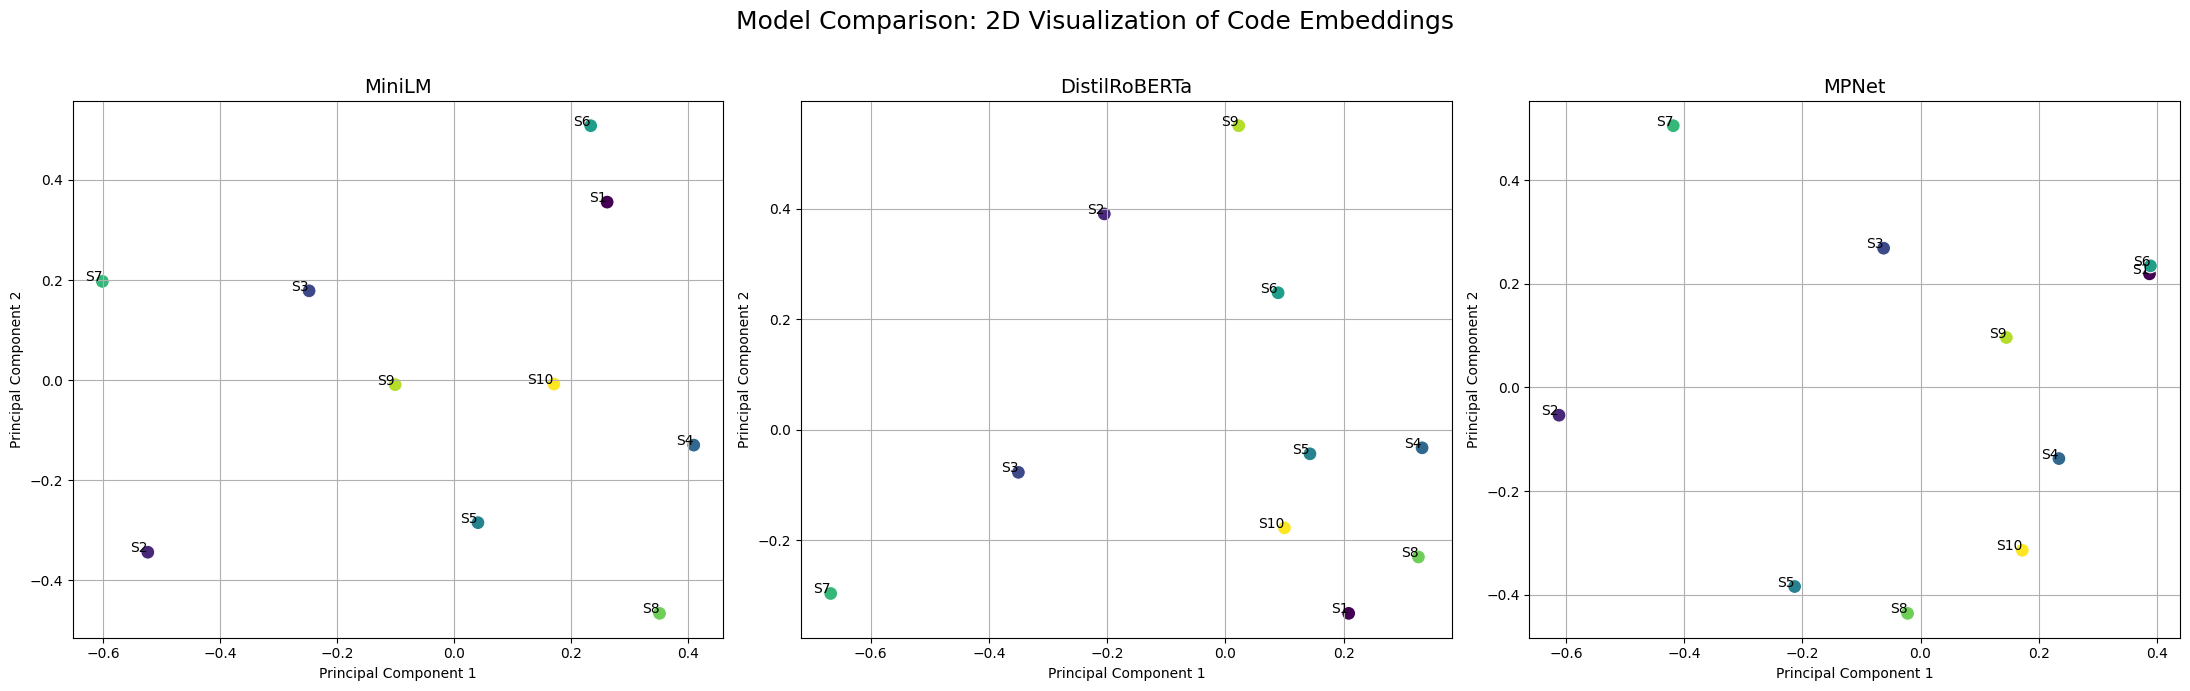

In [ ]:
# Set up the plot: 1 row, 3 columns for the 3 models
fig, axes = plt.subplots(1, 3, figsize=(22, 7))
fig.suptitle('Model Comparison: 2D Visualization of Code Embeddings', fontsize=18)

# Perform PCA and plot for each model
for i, (name, emb) in enumerate(embeddings.items()):
    # Reduce dimensions to 2D using PCA
    pca = PCA(n_components=2)
    embeddings_2d = pca.fit_transform(emb)

    # Create a scatter plot
    ax = axes[i]
    sns.scatterplot(x=embeddings_2d[:, 0], y=embeddings_2d[:, 1], ax=ax, s=100, hue=range(10), palette='viridis', legend=False)

    # Add labels (S1, S2, etc.) to each point
    for j, snippet in enumerate(code_snippets):
        ax.annotate(f"S{j+1}", (embeddings_2d[j, 0], embeddings_2d[j, 1]), fontsize=10, ha='right')

    ax.set_title(name, fontsize=14)
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()